---
# DBSCAN Clustering
---

## Introduction

K menas clustering is a simple and popular unsupervised machine learning algorithm. It is useful for clustering similar data points together and finding patterns in unlabeled data. But it is not easy to two groups while one have different size and density. For example, in the image below, we can easily find two groups by eye, but we know using k means will fail to find two groups.

<img src="https://miro.medium.com/v2/resize:fit:664/1*qjIc4xmvlQ_Ma4i71V6fig.png" width="200">

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm. It groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). It is one of the most common clustering algorithms and also one of the most flexible since it allows the user to choose the parameters that suit their data best.

---

## Algorithm

The main idea behind DBSCAN is that a cluster is a dense region of data points separated by areas of lower point density.

DBSCAN algorithm requires two parameters:

1. `eps`: A distance threshold that defines the neighborhood of a data point.
2. `min_samples`: The minimum number of data points required to form a dense region.

Given a dataset $X = \{x_1, x_2, \dots, x_N\}$, where $N$ is the number of data points and each point $x_i$ is an $M$-dimensional vector, the algorithm can be summarized as follows:

1. For each data point $x_i$, calculate the number of neighboring points within the `eps` radius, and identify the core points. A core point is a point that has at least `min_samples` points in its `eps`-neighborhood, including itself.

    The neighborhood of a point $x_i$ is defined as:

    $$
    N(x_i) = \{x_j \in X : d(x_i, x_j) \leq \text{eps} \}
    $$

    where $d(x_i, x_j)$ is the distance between points $x_i$ and $x_j$.

2. For each core point, if it hasn't been assigned to a cluster, create a new cluster and recursively expand the cluster by adding all its neighbors within `eps` distance. If a neighbor is also a core point, continue expanding the cluster by adding the neighbor's neighbors. Points that do not belong to any cluster are considered noise.

The algorithm can be described in the following steps:

1. Start with an arbitrary unvisited data point $x_i$.
2. Compute its `eps`-neighborhood, $N(x_i)$, and check if it has at least `min_samples` points:
    a. If yes, create a new cluster $C$ and add $x_i$ and all its neighbors to the cluster.
    b. If no, mark $x_i$ as visited and move to the next unvisited point.
3. For each point in the newly added neighbors, compute their `eps`-neighborhood:
    a. If a neighbor has at least `min_samples` points, add its neighbors to the cluster.
    b. If a neighbor is a border point (not a core point but belongs to the `eps`-neighborhood of a core point), add it to the cluster, but do not expand further.
4. Repeat steps 2 and 3 until all data points have been visited or assigned to a cluster.

The resulting clusters are groups of dense regions separated by areas of lower point density. Noise points are not assigned to any cluster.


---


## Illustration

<img src="https://www.researchgate.net/publication/342141592/figure/fig4/AS:901775972380681@1592011554293/An-Example-Illustrating-the-Density-Based-DBSCAN-Clustering-Method-Applied-to-SMLM-Data.png" width="600">

---

## Advantages and Disadvantages

### Advantages

- DBSCAN is very flexible in terms of the shape of the clusters it can detect. It can detect clusters of any shape, unlike k-means which assumes that clusters are convex and isotropic.
- DBSCAN does not require the user to specify the number of clusters in the data a priori, unlike k-means.
- DBSCAN is well suited for data containing clusters of similar density.

### Disadvantages

- DBSCAN does not perform well when the clusters have varying densities.
- DBSCAN is not well suited for data containing clusters of widely varying sizes.
- DBSCAN is not well suited for high dimensional data.

---

## Implementation

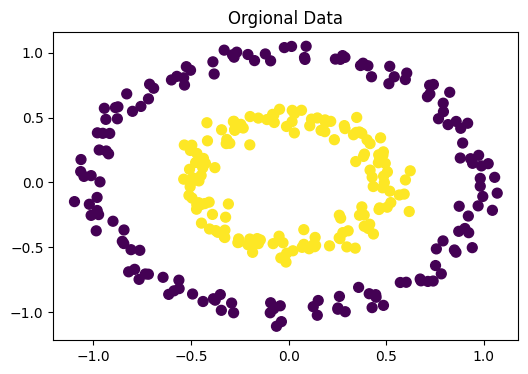

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles

# Generate some data for DBSCAN 
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Plot the data with the labels 
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title('Orgional Data')
plt.show()


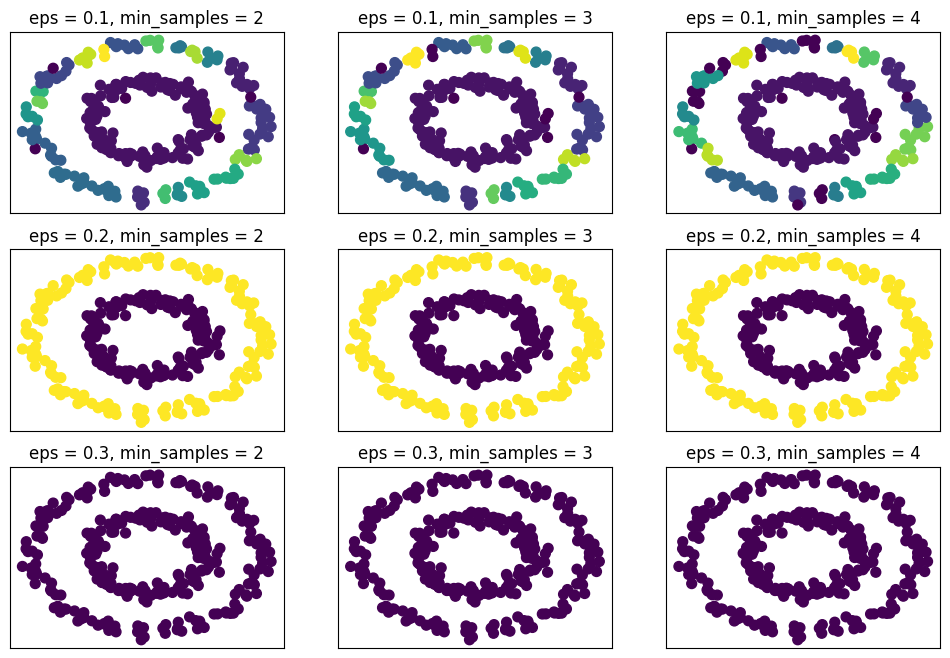

In [16]:
#compare different eps and min_samples using DBSCAN 

eps = [0.1, 0.2, 0.3]
min_samples = [2, 3, 4, 5, 6]

#plot the DBSCAN results in three rows
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for i in range(3):
    for j in range(3):
        db = DBSCAN(eps=eps[i], min_samples=min_samples[j])
        y_pred = db.fit_predict(X)
        axes[i, j].scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
        axes[i, j].set_title('eps = {}, min_samples = {}'.format(eps[i], min_samples[j]))
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.show()

# Conclusion

DBSCAN is a very useful clustering algorithm that can detect clusters of any shape. It is also very flexible in terms of the number of clusters it can detect. 